In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('Downloads/HousePrediction.csv')


In [4]:
data.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [7]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [8]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [9]:
#Task 2: Data Analysis

# Checking for Missing Values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


In [10]:
# Identifying Features with NaN Values
features_with_nan = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
print("Features with NaN values:", features_with_nan)

Features with NaN values: ['MSZoning', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


In [11]:
# Calculate mean sales price for features with missing and present information
for feature in features_with_nan:
    data = data.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    mean_price = data.groupby(feature)['SalePrice'].mean()
    print(mean_price)

MSZoning
0    180921.19589
1             NaN
Name: SalePrice, dtype: float64
Exterior1st
0    180921.19589
1             NaN
Name: SalePrice, dtype: float64
BsmtFinSF2
0    180921.19589
1             NaN
Name: SalePrice, dtype: float64
TotalBsmtSF
0    180921.19589
1             NaN
Name: SalePrice, dtype: float64
SalePrice
0    0.0
1    1.0
Name: SalePrice, dtype: float64


In [13]:
# Count of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
print("Count of numerical features:", len(numerical_features))

Count of numerical features: 11


In [14]:
print(data[numerical_features].head())


   Id  MSSubClass  MSZoning  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0   0          60         0     8450            5       2003          2003   
1   1          20         0     9600            8       1976          1976   
2   2          60         0    11250            5       2001          2002   
3   3          70         0     9550            5       1915          1970   
4   4          60         0    14260            5       2000          2000   

   Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0            0           0            0          0  
1            0           0            0          0  
2            0           0            0          0  
3            0           0            0          0  
4            0           0            0          0  


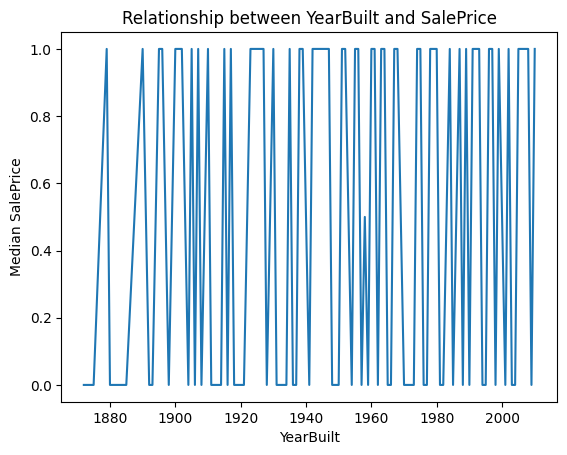

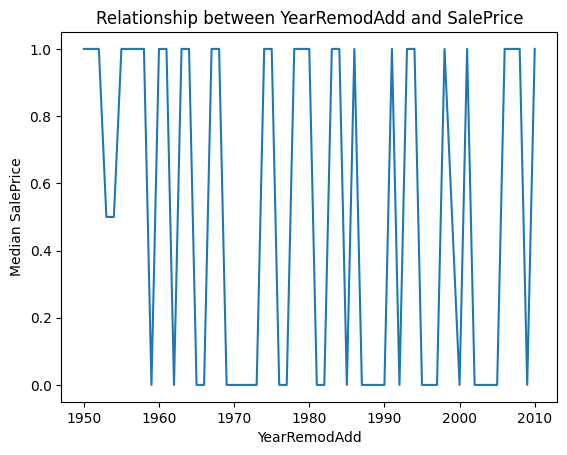

In [17]:
# Compare the difference between all year features with SalePrice
year_features = ['YearBuilt', 'YearRemodAdd']
for feature in year_features:
    data = data.copy()
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.show()


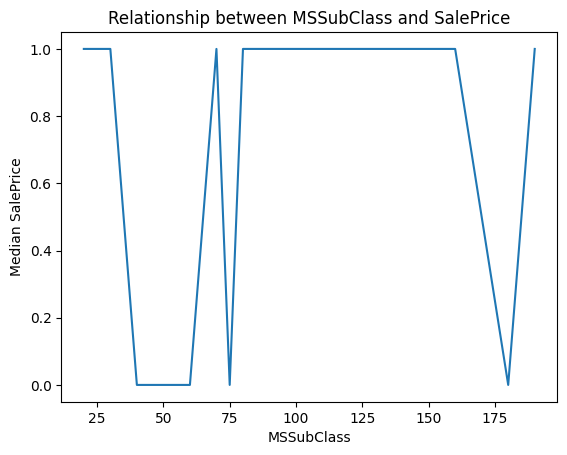

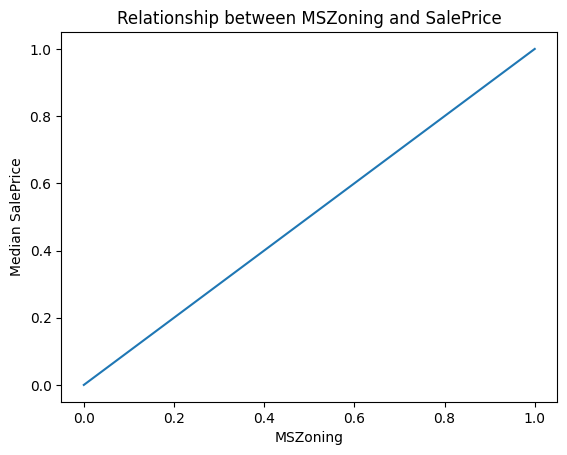

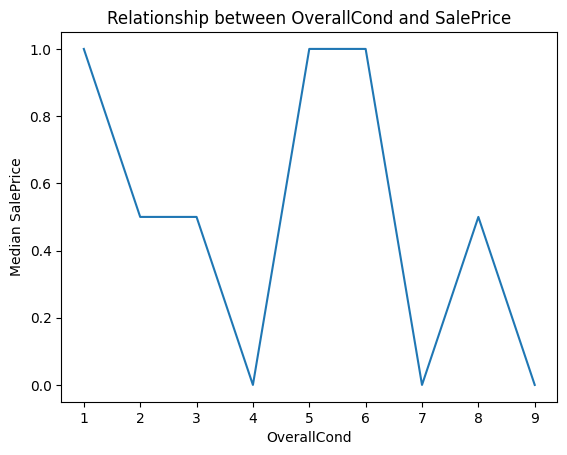

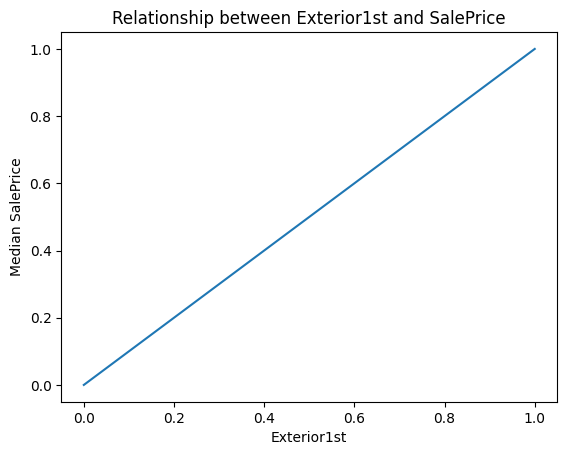

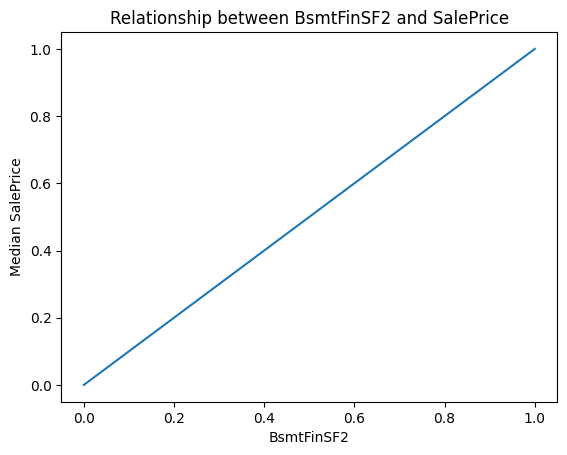

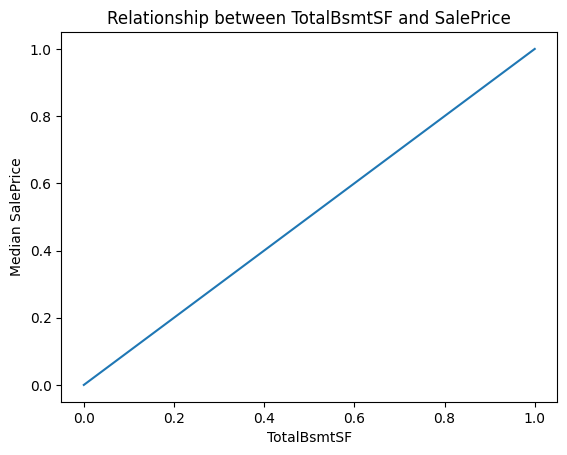

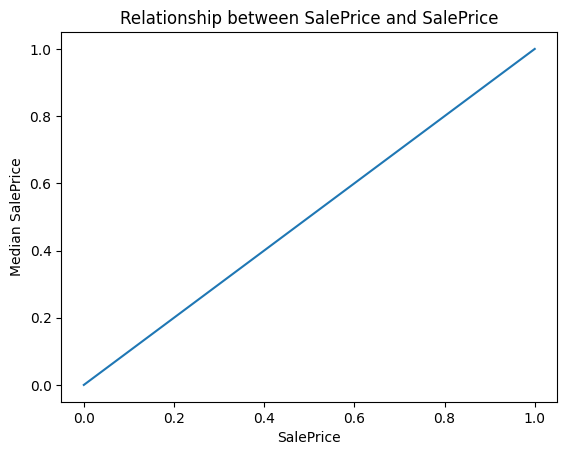

In [18]:
# Analyze the relationship between discrete variables and SalePrice
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25 and feature != 'Id']
for feature in discrete_features:
    data = data.copy()
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.show()


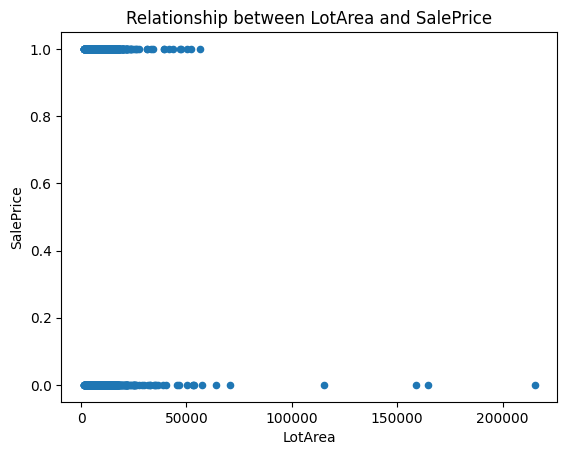

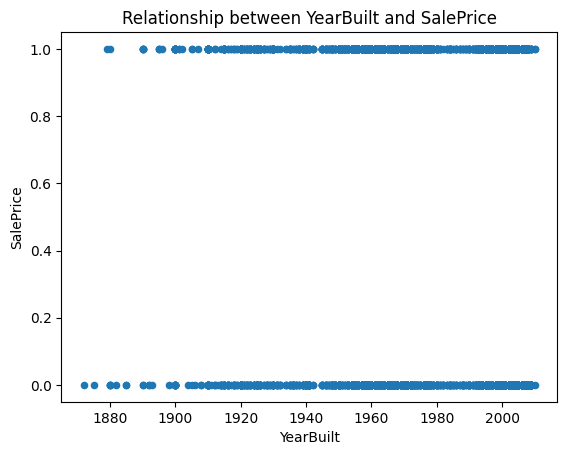

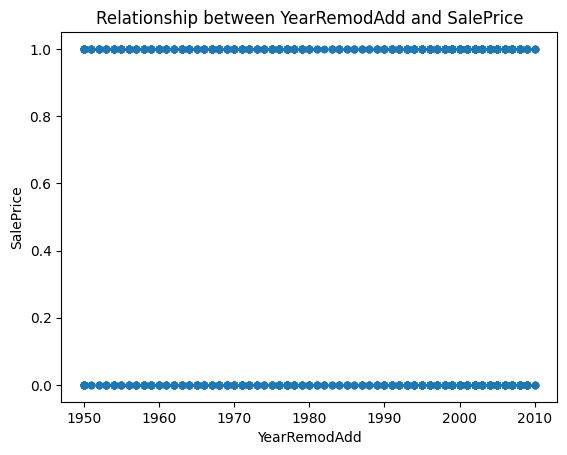

In [19]:
# Analyze the relationship between continuous variables and SalePrice
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['Id']]
for feature in continuous_features:
    data = data.copy()
    data.plot.scatter(x=feature, y='SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.show()

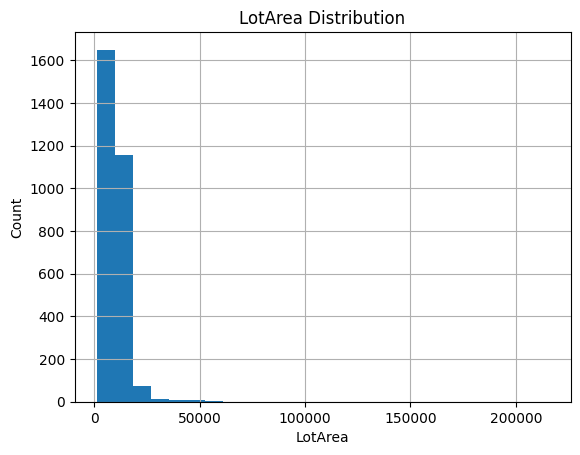

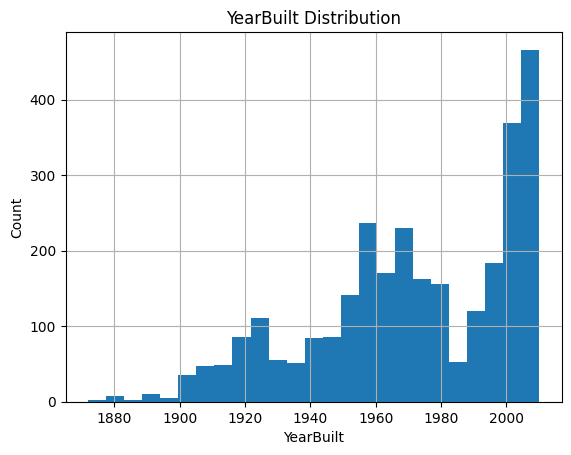

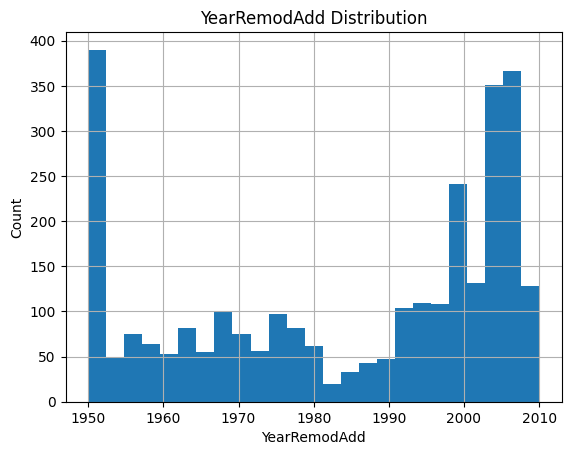

In [20]:
# Create histograms to understand the distribution of continuous values
for feature in continuous_features:
    data = data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Distribution')
    plt.show()


C:\Users\91766\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


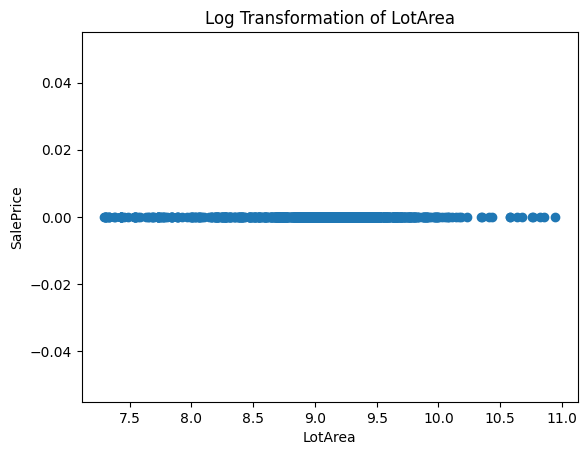

C:\Users\91766\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


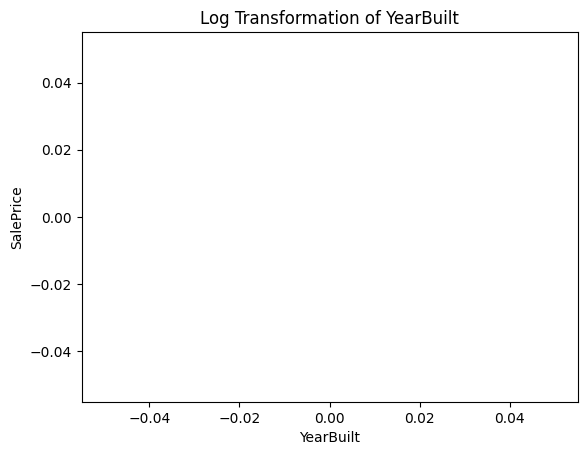

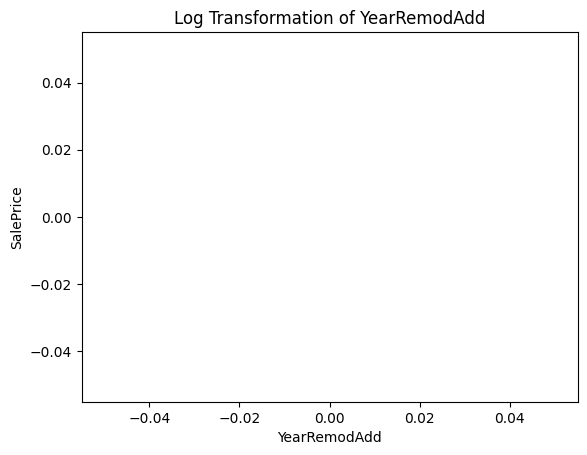

In [21]:
# Apply logarithmic transformation
for feature in continuous_features:
    data = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(f'Log Transformation of {feature}')
        plt.show()

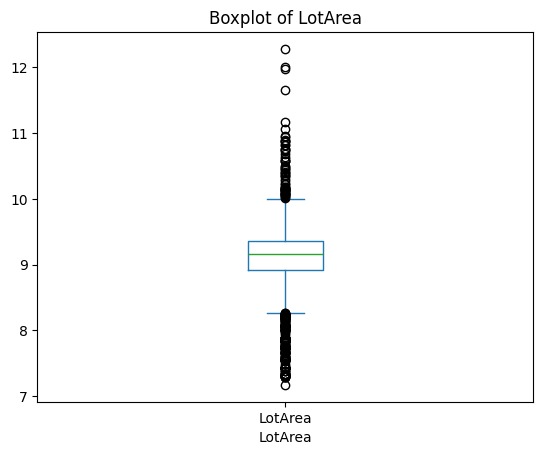

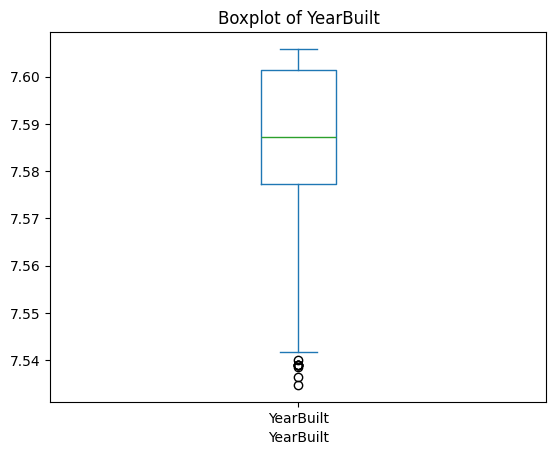

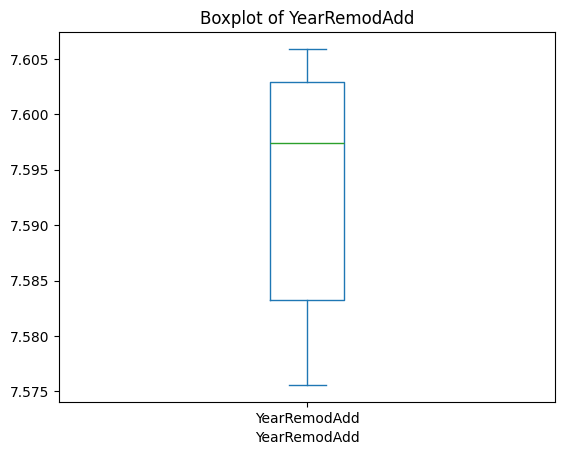

In [22]:
#Task 3: Further Analysis and Feature Engineering
# Identify outliers
for feature in continuous_features:
    data = data.copy()
    data[feature].plot.box()
    plt.xlabel(feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

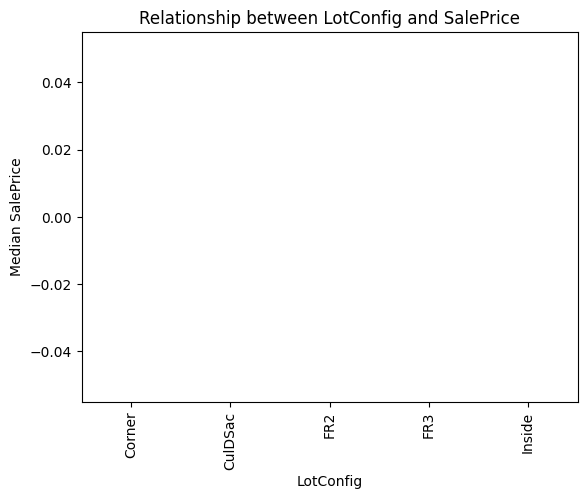

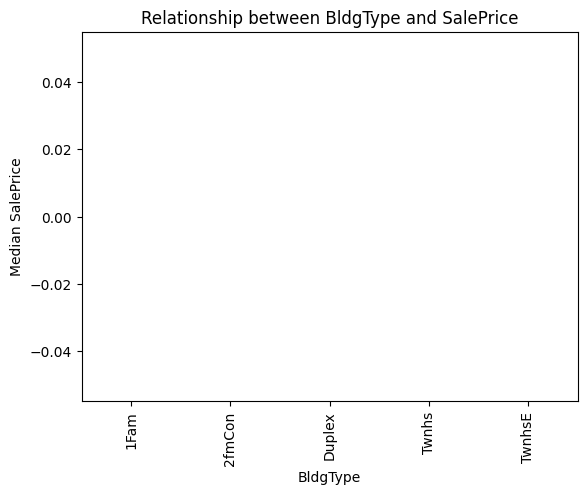

In [23]:
# Analyze the relationship between categorical features and SalePrice
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data = data.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.show()


In [24]:
# Find correlation between numerical features and SalePrice
# Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=[np.number])

# Find correlation between numerical features and SalePrice
correlation = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



ValueError: could not convert string to float: 'Inside'

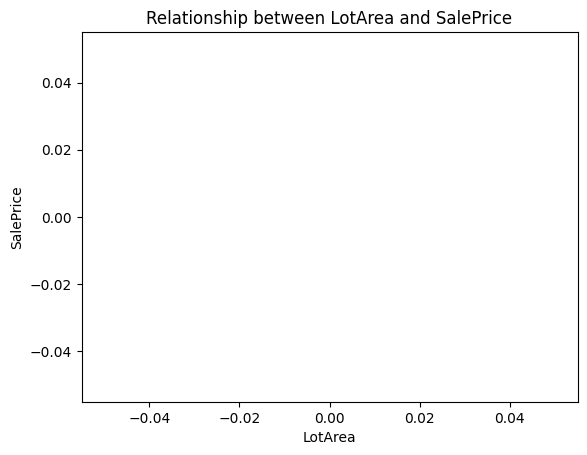

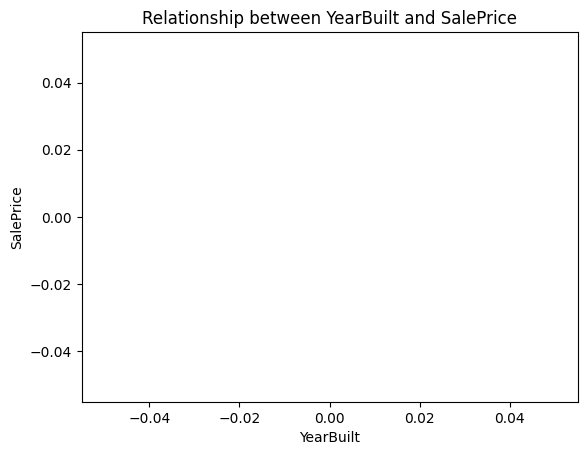

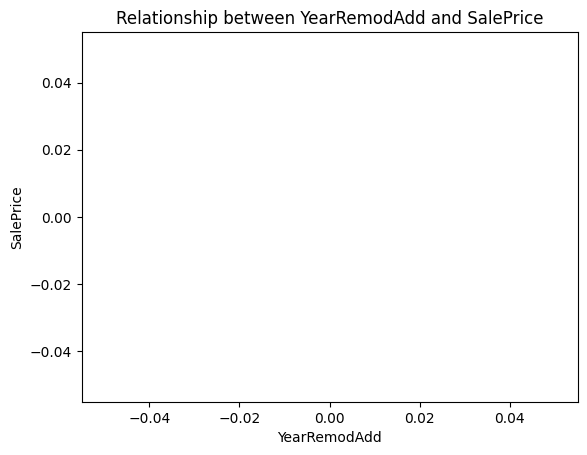

In [25]:
# Examine continuous features vs SalePrice
for feature in continuous_features:
    data = data.copy()
    data.plot.scatter(x=feature, y='SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.show()

In [26]:
# Perform Feature Engineering
# Handling missing values
data.fillna(data.mean(), inplace=True)


TypeError: Could not convert ['InsideFR2InsideCornerFR2InsideInsideCornerInsideCornerInsideInsideInsideInsideCornerCornerCulDSacInsideInsideInsideCornerInsideInsideInsideInsideCornerCornerInsideCulDSacInsideInsideCulDSacCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideCulDSacCulDSacInsideInsideCulDSacInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideCornerCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideCornerCornerInsideCornerInsideInsideInsideInsideCornerCornerFR2InsideInsideInsideCornerInsideCornerCornerInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideCornerCornerInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideCornerInsideCornerCornerInsideCulDSacInsideCornerInsideCulDSacInsideInsideInsideInsideInsideCornerCornerCornerInsideInsideInsideCornerInsideInsideInsideFR2InsideCornerInsideInsideInsideCornerCulDSacInsideInsideCornerInsideCulDSacInsideCornerCornerInsideCornerCornerCornerCulDSacInsideCornerInsideCornerInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideCornerCornerInsideCulDSacInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideCulDSacInsideInsideInsideFR2InsideCornerCornerInsideCornerInsideCornerInsideInsideCornerCulDSacInsideInsideInsideInsideCornerInsideCulDSacFR2InsideInsideInsideCornerInsideInsideInsideInsideFR2InsideInsideInsideInsideFR2InsideInsideInsideInsideCornerInsideInsideFR2CulDSacInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerCornerInsideInsideFR2InsideInsideCornerInsideCulDSacCulDSacInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideCulDSacInsideInsideInsideInsideCornerInsideCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideCornerInsideCulDSacInsideInsideCornerInsideInsideInsideFR3InsideCornerCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacCulDSacInsideCornerInsideFR2InsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideCulDSacCornerCornerInsideInsideInsideInsideCornerCornerInsideFR2InsideCulDSacInsideInsideCulDSacInsideCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideCulDSacInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerCornerCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideCulDSacInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideFR2InsideCornerFR2CornerInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideCornerCornerInsideInsideCornerInsideCulDSacInsideInsideCornerCornerInsideInsideInsideInsideInsideInsideCulDSacInsideFR3InsideInsideInsideInsideCulDSacFR2InsideInsideInsideFR2InsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideCulDSacCornerInsideInsideInsideCornerInsideInsideCornerInsideFR2InsideInsideInsideCornerInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCulDSacCulDSacCornerInsideCulDSacCornerInsideInsideCornerInsideFR2InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCulDSacCulDSacInsideFR2InsideCornerInsideCornerInsideCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerInsideCornerCornerInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideFR2InsideInsideCulDSacInsideInsideInsideInsideCulDSacCulDSacInsideInsideInsideCornerFR2InsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideCornerCulDSacInsideCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideFR2InsideInsideInsideCornerInsideInsideInsideInsideInsideCulDSacCornerCulDSacInsideInsideCulDSacInsideCornerInsideInsideInsideInsideInsideCulDSacInsideCornerInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCulDSacInsideCulDSacInsideFR2InsideInsideInsideCornerInsideCornerInsideInsideInsideCornerCornerInsideCornerInsideInsideInsideInsideCornerCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideCulDSacInsideCulDSacCornerInsideInsideCulDSacCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideCornerInsideInsideInsideCornerCulDSacInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideCornerFR2InsideInsideInsideInsideInsideInsideInsideFR2InsideInsideCulDSacCornerInsideInsideInsideInsideInsideCornerInsideInsideCulDSacInsideInsideInsideInsideFR2InsideCornerCornerCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerFR2InsideInsideInsideCornerCornerCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideFR2InsideInsideInsideInsideInsideCornerCornerInsideCornerInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideCulDSacFR2InsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideCornerCornerInsideInsideCulDSacInsideInsideInsideInsideCornerInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideCornerCornerInsideCornerInsideInsideFR2InsideCornerInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerCornerCulDSacInsideInsideInsideInsideCornerInsideInsideInsideInsideFR2InsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideFR2InsideInsideCulDSacInsideInsideFR2InsideCornerInsideCornerCulDSacInsideInsideInsideInsideInsideInsideCulDSacInsideFR2CornerCornerInsideCornerInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideFR2CornerInsideInsideCornerInsideInsideInsideCornerCornerInsideInsideCulDSacInsideInsideInsideCulDSacInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacCornerCornerInsideInsideInsideFR2InsideInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideCornerCornerInsideFR2CulDSacInsideInsideInsideInsideFR3InsideInsideInsideInsideInsideInsideCulDSacCornerCornerCornerCulDSacCulDSacInsideInsideInsideCulDSacInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideCornerInsideCulDSacInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerCulDSacInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideInsideCornerCornerCornerInsideInsideInsideInsideCornerInsideCulDSacCornerInsideInsideInsideInsideInsideCulDSacInsideInsideCornerCulDSacInsideFR3InsideInsideFR2InsideInsideInsideInsideInsideInsideFR2CornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCulDSacCornerInsideCornerCornerInsideCulDSacInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideCulDSacInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideInsideFR2FR2InsideInsideInsideInsideInsideInsideFR2InsideCulDSacInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideCornerFR2InsideInsideFR2FR2InsideCornerInsideInsideInsideCornerInsideCornerInsideInsideInsideCulDSacInsideInsideCornerInsideCornerCulDSacInsideInsideCulDSacInsideInsideInsideInsideCornerFR2InsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideCornerInsideCornerInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideCornerCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerCulDSacInsideInsideInsideInsideInsideCulDSacInsideCulDSacInsideInsideCornerInsideFR2InsideInsideInsideInsideInsideCornerCulDSacInsideInsideInsideInsideCornerInsideInsideInsideInsideFR2InsideInsideInsideInsideCornerCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCulDSacCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCulDSacInsideCornerInsideInsideInsideFR2InsideInsideFR2FR2InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideFR3CulDSacInsideInsideCornerCornerCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCulDSacInsideInsideCulDSacInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideCulDSacInsideInsideInsideCulDSacInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideFR2InsideInsideFR2CulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideCornerCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideCulDSacCornerCornerInsideInsideCornerInsideInsideInsideCornerInsideInsideCornerInsideInsideCornerCornerInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideCornerCornerInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerCornerInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerCornerCornerInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideCornerCulDSacInsideInsideInsideInsideInsideInsideCornerFR2InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCulDSacInsideInsideInsideInsideInsideCulDSacInsideCornerInsideInsideCornerFR3InsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerCulDSacCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideCornerFR3InsideCornerCulDSacFR2InsideInsideInsideInsideCulDSacInsideCornerInsideInsideCornerInsideFR3FR2FR2InsideInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideFR2InsideInsideFR2InsideCulDSacCulDSacInsideInsideInsideInsideCornerInsideInsideInsideInsideFR2InsideCornerInsideInsideCulDSacInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCulDSacCulDSacInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerCornerInsideCornerCornerInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideInsideCornerCornerInsideInsideCornerCornerInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideFR2FR3InsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideCulDSacCornerCulDSacInsideInsideInsideCornerCornerInsideCulDSacInsideInsideInsideInsideCornerCornerInsideCulDSacCornerInsideInsideInsideInsideCornerCulDSacInsideInsideCornerInsideInsideInsideInsideCulDSacInsideCulDSacCulDSacCulDSacInsideInsideCornerInsideCornerInsideInsideInsideInsideCulDSacInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideCornerCornerInsideInsideCornerInsideInsideCulDSacCulDSacInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideCornerInsideInsideInsideInsideCornerFR2FR2CornerInsideInsideInsideInsideCornerInsideInsideInsideCornerInsideInsideInsideCulDSacInsideInsideInsideCornerCulDSacInsideInsideInsideInsideCulDSacFR2InsideInsideInsideInsideInsideInsideInsideFR2InsideInsideCulDSacInsideInsideInsideFR2InsideFR2InsideInsideInsideInsideFR2InsideCornerInsideInsideInsideInsideCulDSacCulDSacCornerInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideInsideCornerInsideCornerCornerInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideCulDSacCulDSacFR2InsideInsideInsideInsideInsideInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideCornerCornerInsideInsideCornerInsideInsideInsideInsideCulDSacCulDSacInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideFR3InsideInsideCornerInsideInsideInsideInsideCornerInsideCornerCornerInsideInsideCornerInsideInsideCulDSacInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideCulDSacCulDSacInsideInsideInsideInsideInsideCulDSacCulDSacCornerInsideInsideInsideInsideInsideInsideInsideCornerCulDSacInsideFR2InsideInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacCulDSacInsideInsideInsideCornerCulDSacCornerInsideInsideInsideCornerInsideCornerInsideInsideCulDSacInsideCulDSacCulDSacInsideCornerInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideInsideFR3InsideInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideCornerCulDSacCornerInsideInsideInsideCulDSacCulDSacInsideInsideInsideCulDSacCulDSacCulDSacCulDSacCornerInsideInsideFR3InsideInsideInsideInsideInsideInsideFR2InsideInsideInsideInsideInsideInsideInsideFR2InsideInsideCornerCornerCornerCornerInsideCornerInsideInsideInsideCornerCornerInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideFR3InsideCornerInsideInsideInsideInsideInsideInsideCulDSacCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCulDSacInsideInsideCulDSacInsideInsideCornerInsideInsideInsideInsideFR2CornerInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideCulDSacInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerCornerCornerCornerInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideCornerCornerInsideCornerInsideInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideFR3InsideCornerInsideCornerFR2InsideInsideInsideInsideCornerCornerInsideCulDSacInsideInsideInsideInsideInsideCornerInsideCornerInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerInsideCornerInsideInsideInsideCornerInsideCulDSacInsideCornerInsideCulDSacInsideInsideCulDSacCornerInsideInsideFR2CornerCornerInsideInsideInsideInsideFR2InsideCulDSacInsideInsideInsideCornerInsideInsideInsideCornerFR2InsideInsideInsideInsideInsideCornerInsideCornerInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideInsideCornerCornerInsideInsideCornerInsideInsideInsideInsideInsideCornerInsideInsideInsideInsideInsideInsideInsideInsideInsideInside'
 '1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam2fmCon1Fam1Fam1FamDuplex1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1FamDuplex1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam2fmConTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1FamDuplexTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexTwnhsE1Fam1Fam1FamTwnhs1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhs1FamTwnhs1FamTwnhsE1Fam1FamTwnhs1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam2fmCon1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1FamDuplex1Fam1FamTwnhsE1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1FamDuplexTwnhsETwnhsE1Fam1Fam1FamTwnhs1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1FamTwnhsE1FamTwnhs1Fam1Fam1Fam1Fam1Fam1FamDuplex1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam2fmConTwnhsTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1FamTwnhsEDuplex1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexDuplex1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1FamTwnhsE1FamTwnhs1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1FamDuplex2fmCon1Fam2fmCon1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam2fmCon1Fam2fmCon1FamTwnhsE1Fam1Fam1Fam1FamTwnhsE2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamDuplex1FamTwnhsE1Fam1Fam1Fam1Fam1FamDuplex1FamDuplex1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamDuplexDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsEDuplex1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamDuplexTwnhsETwnhs1Fam1Fam1Fam1Fam1FamDuplex1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1FamDuplexDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexDuplexTwnhsE1Fam1FamTwnhs1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1FamTwnhsTwnhsE1Fam1FamTwnhs1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamDuplex2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexTwnhsE1Fam1FamTwnhsE1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhs2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsTwnhsE1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1FamTwnhsE1Fam2fmCon1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamTwnhsTwnhsEDuplexTwnhs1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1FamTwnhs1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam2fmConTwnhs1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamDuplexDuplexDuplex1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsE2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1FamTwnhsE1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam2fmConTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamTwnhsE2fmCon1Fam1Fam1Fam1FamTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsDuplex1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhsETwnhsTwnhsTwnhsTwnhs1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsTwnhsTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam2fmConDuplex1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamDuplex1FamTwnhsETwnhsE1Fam1Fam1FamTwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1FamTwnhsTwnhsTwnhsETwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsTwnhsTwnhsETwnhsTwnhsTwnhsETwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsTwnhsE1Fam1FamTwnhsETwnhsE1FamTwnhsE1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsTwnhsETwnhsETwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamDuplex1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam2fmCon1Fam1Fam2fmCon1FamDuplexDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1FamDuplexDuplexDuplexDuplexDuplexDuplexDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1FamTwnhsTwnhsETwnhs1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1FamTwnhsE1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamTwnhsTwnhsTwnhsTwnhsETwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsETwnhsETwnhsTwnhsETwnhsE1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsTwnhsETwnhsETwnhsETwnhsETwnhs1FamTwnhsTwnhsTwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsEDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexDuplex2fmCon1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsE1Fam1FamDuplex1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1FamTwnhsE1FamTwnhsETwnhsETwnhsTwnhs1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsE1Fam1Fam2fmConTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsTwnhsTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsTwnhsTwnhsETwnhsTwnhsETwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsETwnhsETwnhsTwnhs1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam2fmCon2fmCon1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1FamTwnhsE1FamDuplexDuplex1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1FamTwnhs1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsTwnhsTwnhsETwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsTwnhsTwnhsTwnhsE1FamTwnhsTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsE1Fam1Fam1Fam1Fam1FamTwnhsETwnhsETwnhsETwnhsE1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsE1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsETwnhsTwnhsETwnhsE1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexDuplex1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexDuplex1Fam1Fam1Fam1FamTwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1FamTwnhsE1Fam1Fam1Fam1Fam1FamDuplex1Fam1Fam1Fam1FamTwnhsETwnhs1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1FamTwnhsETwnhsE1FamDuplex1Fam1Fam1Fam1Fam1Fam1Fam1FamDuplexTwnhsE1FamDuplexTwnhsTwnhsE1FamTwnhsTwnhsTwnhsTwnhsE1Fam1Fam1Fam'] to numeric

In [27]:
# Handling categorical variables
data = pd.get_dummies(data, drop_first=True)


In [28]:
# Handling numerical variables
for feature in continuous_features:
    data[feature] = data[feature].fillna(data[feature].mean())

In [29]:
# Handling temporal variables
for feature in year_features:
    data[feature] = data['YrSold'] - data[feature]

KeyError: 'YrSold'